In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df=pd.read_csv("monthly-milk-production-pounds-p.csv")

In [4]:
df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


<Axes: >

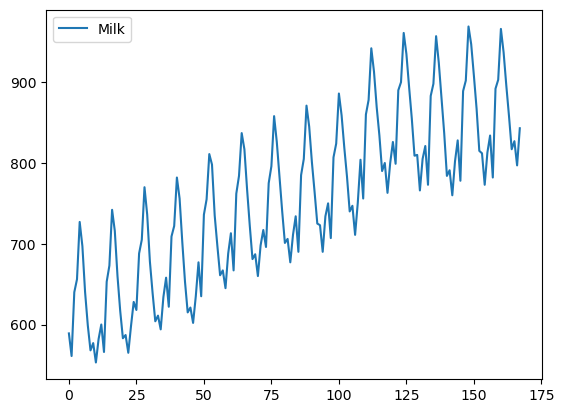

In [5]:
df.plot()

# Additive Decomposition

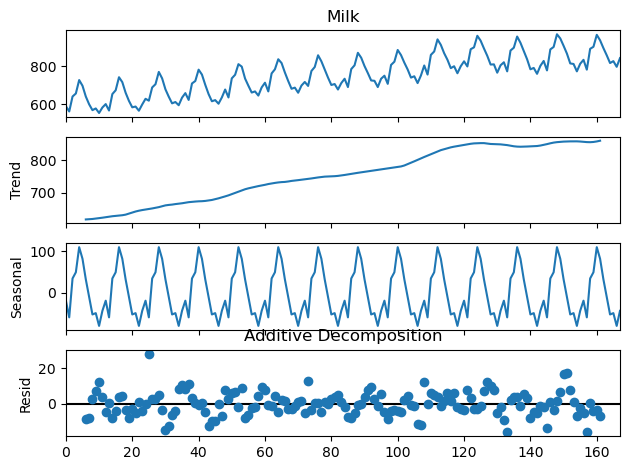

In [6]:
series=df['Milk']
result=seasonal_decompose(series,model='additive',period=12)
result.plot()
plt.title("Additive Decomposition")
plt.show()

# Multiplicative Decomposition

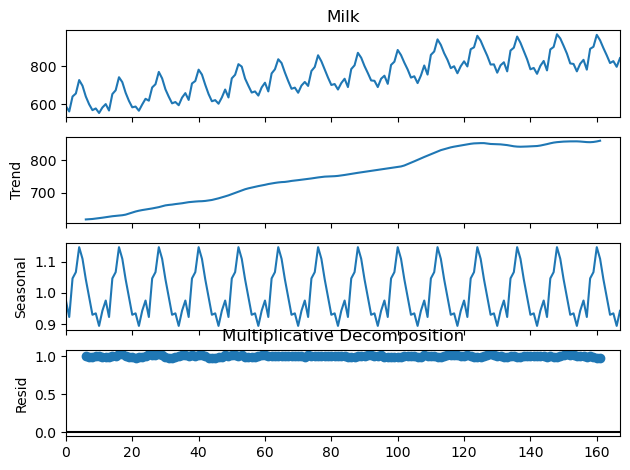

In [7]:
series=df['Milk']
result=seasonal_decompose(series,model='multiplicative',period=12)
result.plot()
plt.title("Multiplicative Decomposition")
plt.show()

# With Centered Moving Average

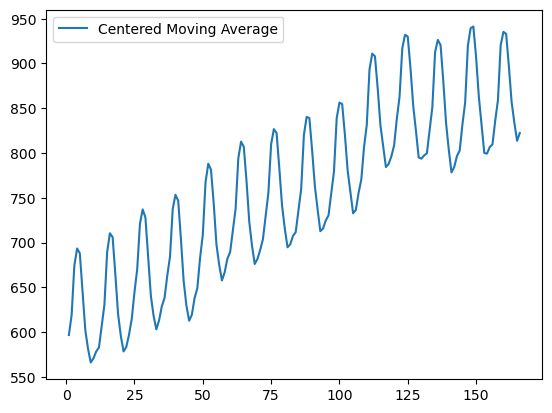

In [8]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv")
df.head()

y = df['Milk']
#### Centered MA
fcast = y.rolling(3,center=True).mean()
#plt.plot(y, label='Data')
plt.plot(fcast, label='Centered Moving Average')
plt.legend(loc='best')
plt.show()

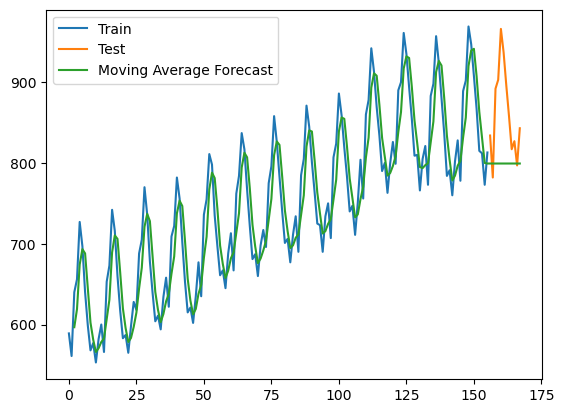

83.33766655400582


In [9]:
from math import sqrt

from sklearn.metrics import mean_squared_error


y = df['Milk']
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
#### Trailing MA
fcast = y_train.rolling(3,center=False).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index=True)

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test,MA_series))
print(rms)

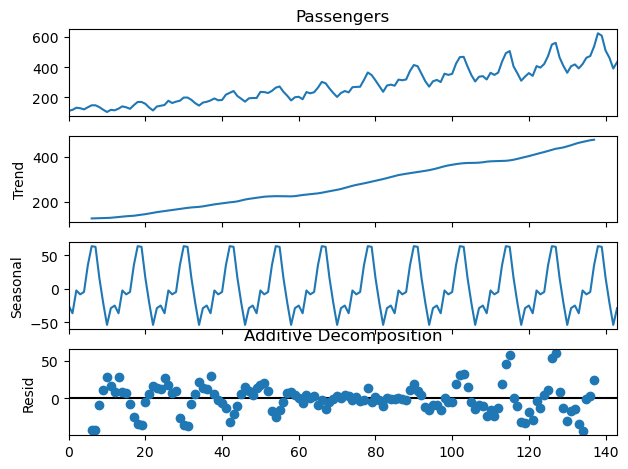

In [12]:
df=pd.read_csv("AirPassengers.csv")

series=df['Passengers']
result=seasonal_decompose(series,model='additive',period=12)
result.plot()
plt.title("Additive Decomposition")
plt.show()

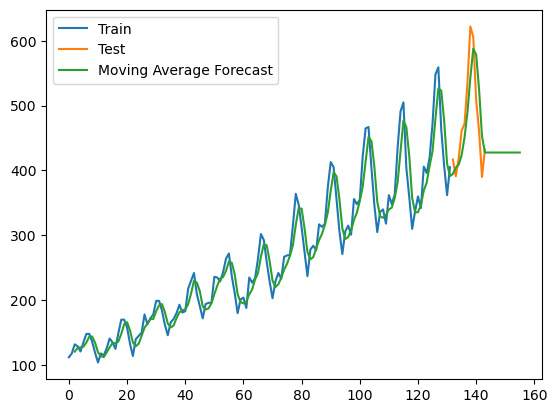

88.83536583040687


In [14]:
from math import sqrt

from sklearn.metrics import mean_squared_error


y = df['Passengers']
y_train = df['Passengers'][:-12]
y_test = df['Passengers'][-12:]
#### Trailing MA
fcast = y.rolling(3,center=False).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index=True)

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test,MA_series))
print(rms)

# 1.Simple Exponential Smoothing

In [21]:
from statsmodels.tsa.api import SimpleExpSmoothing
import warnings
warnings.filterwarnings("ignore")

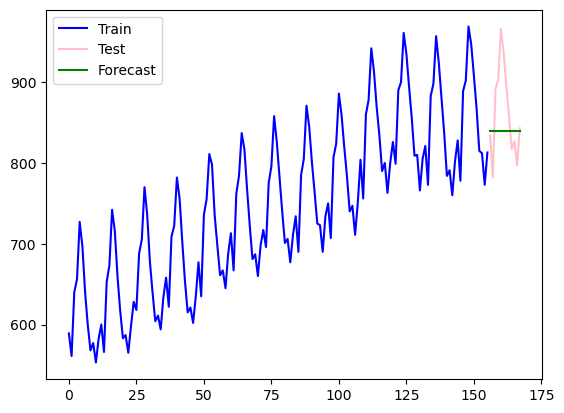

RMSE =  58.79874810884951


In [45]:
df=pd.read_csv("monthly-milk-production-pounds-p.csv")
y=df['Milk']
y_train=df['Milk'][:-12]
y_test=df['Milk'][-12:]
alpha=0.05
ses=SimpleExpSmoothing(y_train)
fit=ses.fit(smoothing_level=alpha)

fcast=fit.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='Pink',label='Test')
fcast.plot(color='green',label='Forecast')
plt.legend(loc="best")
plt.show()

print("RMSE = ",sqrt(mean_squared_error(y_test,fcast)))

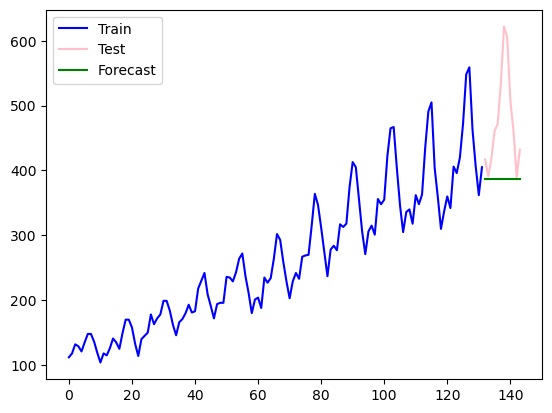

RMSE =  115.77631740318598


In [46]:
df=pd.read_csv("AirPassengers.csv")
y=df['Passengers']
y_train=df['Passengers'][:-12]
y_test=df['Passengers'][-12:]
alpha=0.05
ses=SimpleExpSmoothing(y_train)
fit=ses.fit(smoothing_level=alpha)

fcast=fit.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='Pink',label='Test')
fcast.plot(color='green',label='Forecast')
plt.legend(loc="best")
plt.show()

print("RMSE = ",sqrt(mean_squared_error(y_test,fcast)))

# 2.Holt's Linear Method

In [37]:
from statsmodels.tsa.api import Holt,ExponentialSmoothing

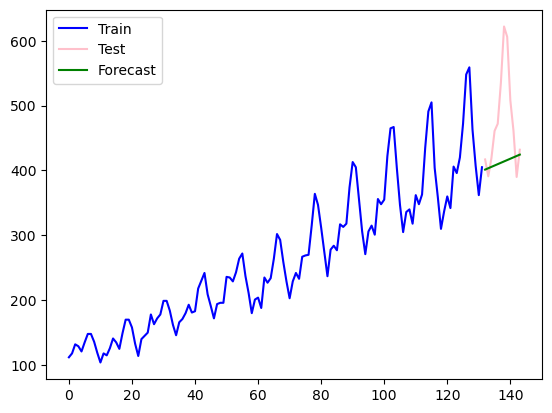

RMSE =  96.89589863669976


In [48]:
alpha=0.8
beta=0.02

# Linear Trend
holt=Holt(y_train)
fit=holt.fit(smoothing_level=alpha,
            smoothing_trend=beta)
# Automatically fits with alpha & beta for train datayufg
fcast=fit.forecast(len(y_test))


y_train.plot(color='blue',label='Train')
y_test.plot(color='Pink',label='Test')
fcast.plot(color='green',label='Forecast')
plt.legend(loc="best")
plt.show()
    
print("RMSE = ",sqrt(mean_squared_error(y_test,fcast)))

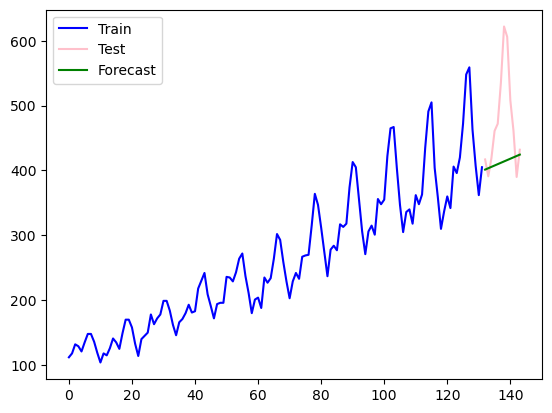

RMSE =  96.89589863669976


In [50]:
alpha=0.8
beta=0.02

# Linear Trend
holt=Holt(y_train)
fit=holt.fit(smoothing_level=alpha,
            smoothing_trend=beta)

fcast=fit.forecast(len(y_test))


y_train.plot(color='blue',label='Train')
y_test.plot(color='Pink',label='Test')
fcast.plot(color='green',label='Forecast')
plt.legend(loc="best")
plt.show()
    
print("RMSE = ",sqrt(mean_squared_error(y_test,fcast)))

# 3.Holt's Exponential Method

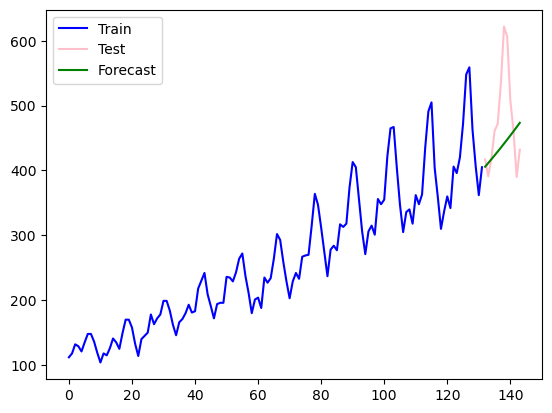

RMSE =  82.66771124569458


In [51]:
alpha=0.8
beta=0.02

# Exponential  Trend
holt=Holt(y_train,exponential=True)
fit=holt.fit(smoothing_level=alpha,
            smoothing_trend=beta)

fcast=fit.forecast(len(y_test))


y_train.plot(color='blue',label='Train')
y_test.plot(color='Pink',label='Test')
fcast.plot(color='green',label='Forecast')
plt.legend(loc="best")
plt.show()

print("RMSE = ",sqrt(mean_squared_error(y_test,fcast)))

# 4.Damped Trend Method 

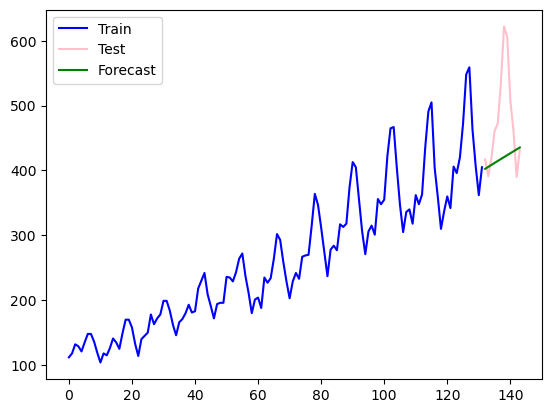

RMSE =  92.78011182498061


In [52]:
alpha=0.8
beta=0.02
phi=0.2

holt=Holt(y_train,exponential=True,damped_trend=True)
fit=holt.fit(smoothing_level=alpha,
            smoothing_trend=beta)

fcast=fit.forecast(len(y_test))


y_train.plot(color='blue',label='Train')
y_test.plot(color='Pink',label='Test')
fcast.plot(color='green',label='Forecast')
plt.legend(loc="best")
plt.show()

print("RMSE = ",sqrt(mean_squared_error(y_test,fcast)))

# 5.Holt's-Winter Seasonal Method(Additive Decomposition)

In [53]:
from sklearn.metrics import mean_squared_error

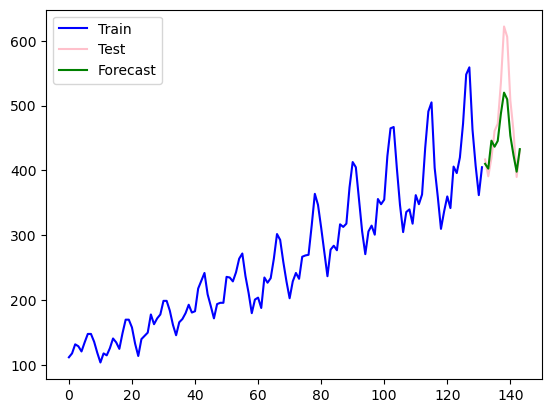

RMSE =  48.78226658327692


In [54]:
alpha=0.8
beta=0.02
gamma=0.1

hw_add=ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')
fit=hw_add.fit(smoothing_level=alpha,
            smoothing_trend=beta,
            smoothing_seasonal=gamma)

fcast=fit.forecast(len(y_test))


y_train.plot(color='blue',label='Train')
y_test.plot(color='Pink',label='Test')
fcast.plot(color='green',label='Forecast')
plt.legend(loc="best")
plt.show()

print("RMSE = ",sqrt(mean_squared_error(y_test,fcast)))